# ASTR-19 Group Project
This notebook is for the astr-19 group project.

Authors: `Jack O'Brien`, `Leo Constantine`, `Veronica Sanchez M`, `Thomas Liao`


In [399]:
# In this cell, we include libraries
import astropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize
import math

Now, we're parsing the file. It will be returned as two lists containing data from each of the columns.

In [400]:
def ParseFile(_Filename:str = "dataset.txt"):
    
    # Firstly, read it into a list line by line
    Lines:list = []
    with open(_Filename, "r") as F:
        for Line in F:
            Lines.append(Line)
    
    # Now, remove those that start with a '#'
    FilteredLines:list = []
    for Line in Lines:
        if "#" not in Line:
            FilteredLines.append(Line)
            
    # Now parse into arrays
    Column0:list = []
    Column1:list = []
    Column2:list = []
    for Line in FilteredLines:
        Column0.append(Line[:3].replace(" ", ""))
        Column1.append(Line[4:9])
        Column2.append(Line[10:].strip("\n"))
            
    # Return arrays
    return Column0, Column1, Column2


Now, we are going to parse the times in terms of seconds, then sort it based on time.

In [401]:
def SortTimes(_Days:list, _Times:list, _Height:list):
    
    # Firstly, we enumerate times, and convert from hh:mm to seconds
    TimeSeconds:list = []
    for i in range(len(_Times)):
        Day = int(_Days[i]) - 1 # days start at 1, not 0
        Hours = int(_Times[i].split(":")[0])
        Minutes = int(_Times[i].split(":")[1])
        Seconds = (Day * 3600 * 24) + (Hours * 3600) + (Minutes * 60)
        TimeSeconds.append(Seconds)
        
    # Build Tuple For Sorting
    TimePairs:list = []
    for i in range(len(_Height)):
        CurrentTime_s = TimeSeconds[i]
        Height = _Height[i]
        TimePairs.append((CurrentTime_s, float(Height)))
    
    # Now Sort it
    TimePairs = sorted(TimePairs)
    
    # Now resplit it
    XValues = []
    YValues = []
    for Pair in TimePairs:
        XValues.append(Pair[0]/(3600))

        YValues.append(Pair[1])
    
    
    
    return XValues, YValues


In [402]:
def PlotTidalWave(_Timestamps:list, _Waveheights:list):
    plt.plot(_Timestamps, _Waveheights)
    plt.xlabel("Elapsed Time since start (hours)")
    plt.ylabel("Wave height (feet)")
    plt.title("Tidal Wave")

In [403]:
def Model(x, a, b, c, d, e, f, g):
    return (np.cos(a*x)*b + f) * (np.sin(c*x)*d + g) + e

In [404]:
def OptimizeModel(_XValues:list, _YValues:list, _Function:object):
    return scipy.optimize.curve_fit(_Function, _XValues, _YValues, p0=[0.017, 6, 0.221, 5, 1, 1, 1], maxfev=100000)


In [419]:
def PerformCurveFit(_XValues:list, _YValues:list):
    
    _XValues = np.asarray(_XValues)
    _YValues = np.asarray(_YValues)
    
    
    BestParams:list = []
    BestError:float = 9999999
    for b in range(1, 50):
        for d in range(1, 50):
    
            NumSamples:int = 8000
            DetailedXValues:list = np.linspace(0, np.max(_XValues), NumSamples)
            DetailedYValues:list = np.interp(DetailedXValues, _XValues, _YValues)

            OptimizedParameters, ErrorValues = scipy.optimize.curve_fit(Model, DetailedXValues, DetailedYValues, p0=[0.017, b/5, 0.221, d/5, 1, 1, 1], maxfev=100000)

            ErrorArray = np.sqrt(np.diag(ErrorValues))
            AvgError = np.average(ErrorArray)

            if (AvgError < BestError):
                print(f"New Best Err: {AvgError}")
                BestError = AvgError
                BestParams = OptimizedParameters
    
    
    plt.plot(DetailedXValues, DetailedYValues)
    plt.plot(DetailedXValues, Model(DetailedXValues, *BestParams.tolist()))
    
    

New Best Err: 233324.93154810322
New Best Err: 53308.166585792336
New Best Err: 48245.222782922545
New Best Err: 44043.318871096315
New Best Err: 43300.29251558661
New Best Err: 42005.87971661067
New Best Err: 42002.386515096136
New Best Err: 34009.96498143411
New Best Err: 29939.64550277136
New Best Err: 29764.078400705715
New Best Err: 29132.926094081984
New Best Err: 27204.742588838362


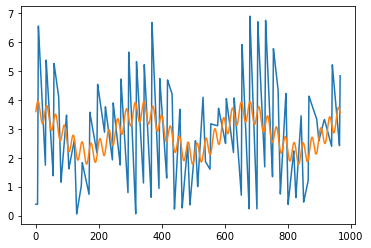

In [420]:
def Main():
    Days, TimesRaw, WaveHeights = ParseFile()
    Timestamps, WaveHeights = SortTimes(Days, TimesRaw, WaveHeights)

    # Make Initial Plot
    #PlotTidalWave(Timestamps, WaveHeights)
    
    PerformCurveFit(Timestamps, WaveHeights)
    
    
    


if __name__ == "__main__":
    Main()